In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import constrainedzoom as cz
import constrainedzoom.plots as cp
import functools
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

# Creating Density Field

In [3]:
HIGH = 64
LOW = 32
SCALE = 2
OFFSET = 5
test = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

In [4]:
high, low = test.realization()
# high_pixel = np.arange(SCALE*OFFSET, LOW+OFFSET*SCALE)
# low_pixel = np.arange(0, SCALE*HIGH, SCALE)

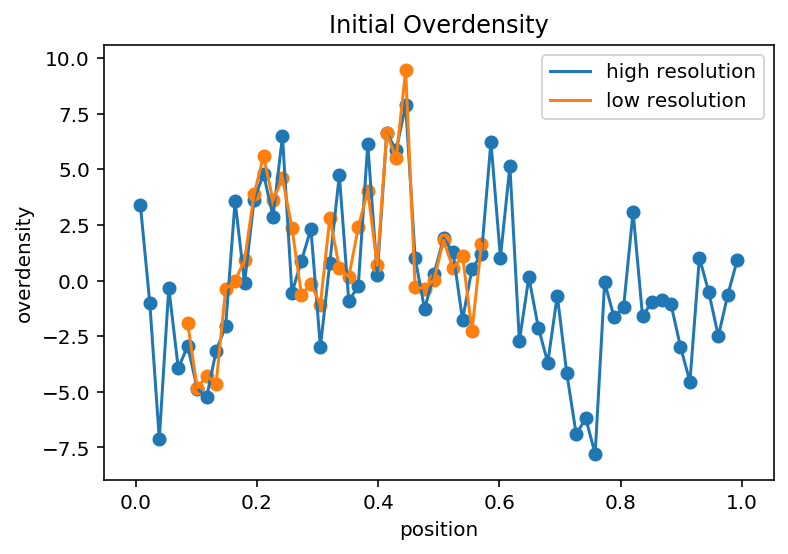

In [5]:
pos = test.xs()
plt.plot(pos[0], high, label='high resolution')
plt.plot(pos[1], low, label='low resolution')
plt.scatter(pos[0], high)
plt.scatter(pos[1], low)
plt.legend()
plt.title("Initial Overdensity")
plt.xlabel("position")
plt.ylabel("overdensity")
plt.savefig("positionIC.png")

In [6]:
# plotting as a single field (the low-res parts are ignored in zoomed window)
# low_pixelmasked = np.ma.masked_inside(low_pixel, SCALE*OFFSET, LOW+OFFSET*SCALE)
# lowmasked = np.ma.fix_invalid(low, mask=low_pixelmasked.mask)

In [7]:
# #TODO: make it into one array
# plt.plot(low_pixelmasked, lowmasked, label = 'low resolution')
# plt.plot(high_pixel, high, label='high resolution')

(32,)
(64,)
(32,)
(32,)


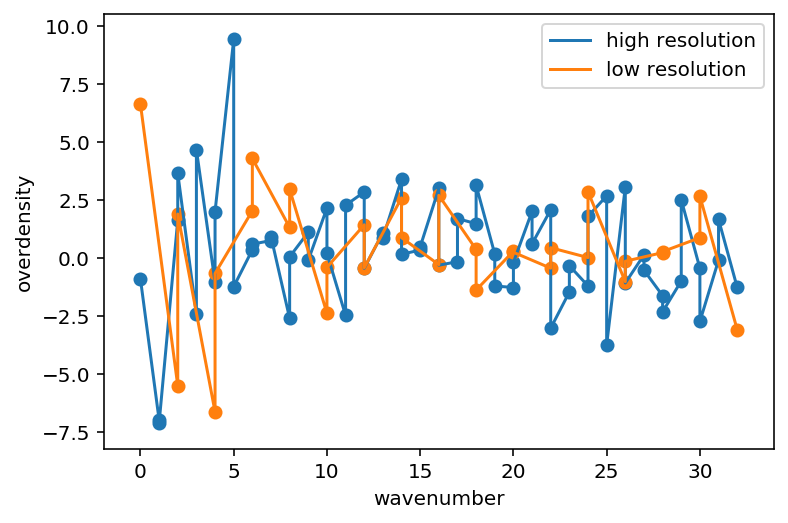

In [10]:
# same plot in Fourier space
klow, khi =test._get_ks()
lowfs = low.in_fourier_space()
hifs = high.in_fourier_space()
plt.plot(khi, hifs, label="high resolution")
plt.plot(klow, lowfs, label="low resolution")
plt.scatter(khi, hifs)
plt.scatter(klow, lowfs)

plt.legend()
plt.xlabel("wavenumber")
plt.ylabel("overdensity")
plt.savefig("wavenumberIC.png")
print(klow.shape)
print(khi.shape)
print(low.shape)
print(lowfs.shape)

Text(0, 0.5, 'wavenumber')

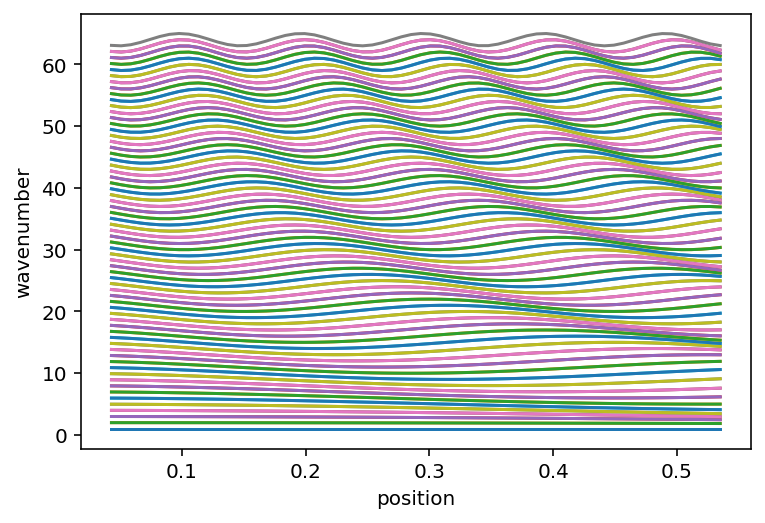

In [11]:
PLOT_OFFSET=65
hires = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH*2, nW=LOW*2, hires_window_scale=SCALE, offset=OFFSET)
klow,khi = hires._get_ks()
xlow, xhi = hires.xs()
lowy = np.zeros((len(xlow),len(klow)))
hiy = np.zeros((len(xhi),len(khi)))

for i in range(len(khi)):
    hiy[:,i] = np.cos(khi[i]*xhi[:])+khi[i]

plt.plot(xhi,hiy)
plt.xlabel('position')
plt.ylabel('wavenumber')

Text(0, 0.5, 'wavenumber')

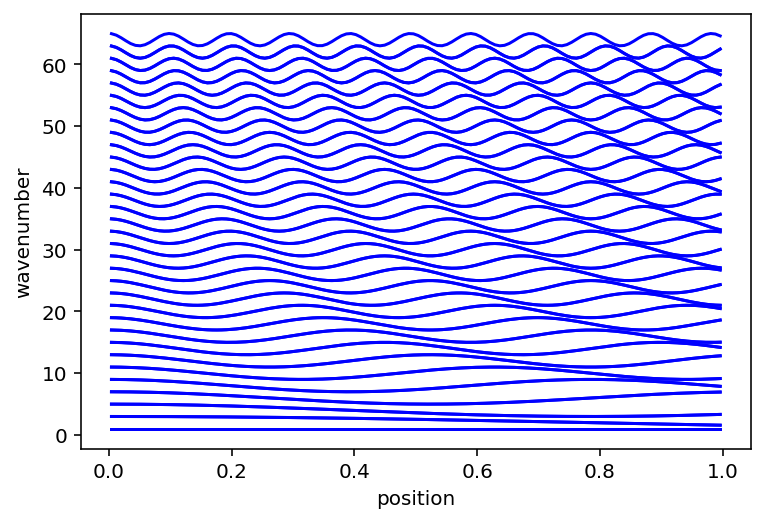

In [12]:
for i in range(len(klow)):
    lowy[:,i] = np.cos(klow[i]*xlow[:])+klow[i]
plt.plot(xlow, lowy, color='blue')
plt.xlabel('position')
plt.ylabel('wavenumber')

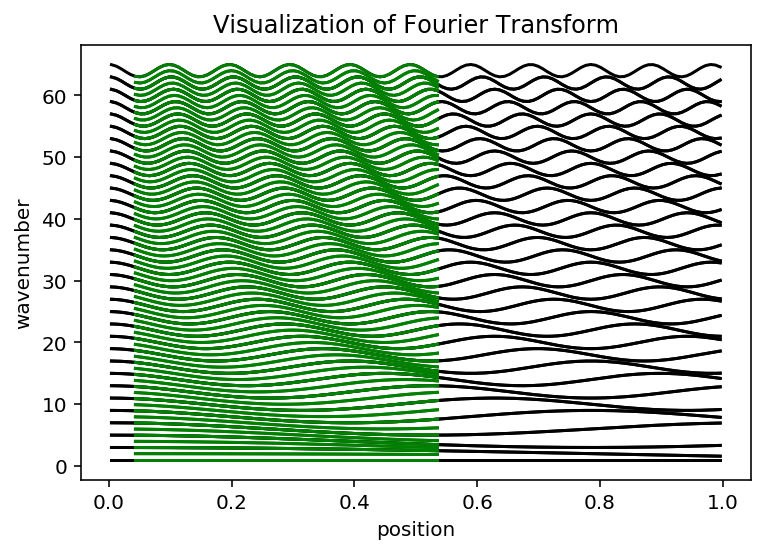

In [17]:
plt.plot(xlow,lowy, color='black')
plt.plot(xhi,hiy, color='green')
plt.xlabel('position')
plt.ylabel('wavenumber')
plt.title("Visualization of Fourier Transform")
plt.savefig("fourier_visual.png")

# Plotting Power Spectrum

/n/local/pkg/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


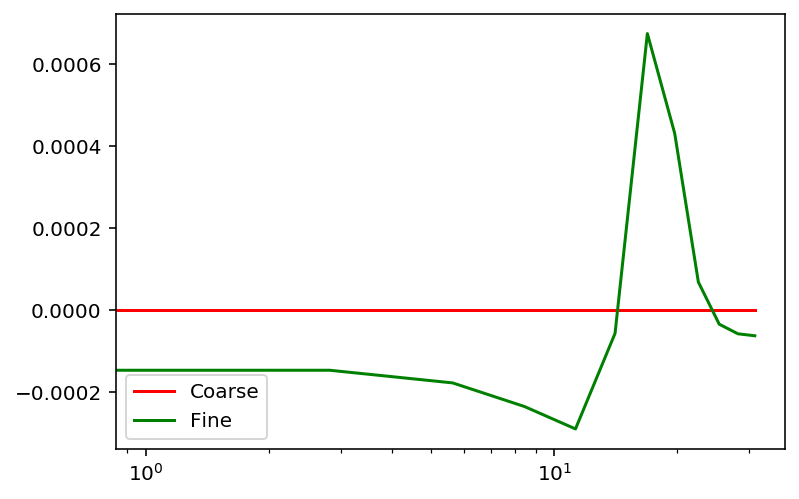

In [8]:
cov = test.get_cov()
cp.cov_zoom_demo(nP=HIGH, nW=LOW, hires_window_scale=SCALE, hires_window_offset=OFFSET,plaw=0,
                 errors=True,plot_type='pspec')

(64,)
(32,)


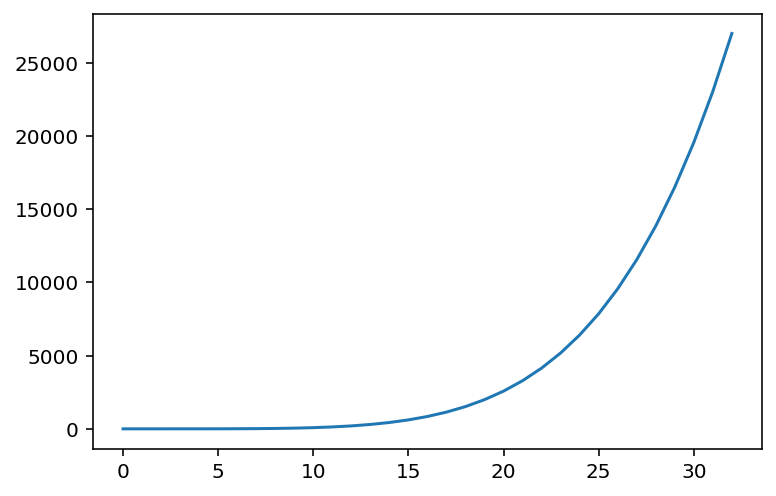

In [23]:
#plotting power spectrum for the low-res example
khi, klow=test._get_ks()
lowfs = low.in_fourier_space()
# plt.plot(klow, lowfs)
mycov = 1/(len(klow)-1)*np.outer(klow, klow)
power = mycov.diagonal()/2*(np.pi)**(-2)
power = np.multiply(power,(klow)**3)
plt.plot(klow,power)
print(klow.shape)
print(khi.shape)

In [14]:
# trying the implementation used in plot_power_spec(...) from cp
cov = test.get_cov()
C11 = cov[:test.nP,:test.nP]
C12 = cov[:test.nP,test.nP:]
C22 = cov[test.nP:,test.nP:]
# why divide it up this way? This doesn't look like it separates into low/high res parts of the matrix...

# defining nyquist frequencies
k_nyq_1 = test.nP/2
k_nyq_2 = test.nW * G.nW

(96, 96)
